In [11]:
import numpy as np

from microrender.point import Point
from microrender.window import Window
from microrender.vertices import Vertices


n = 200
window = Window(n, n)
rotation_axis, angle = Point(1.0, 0.0, 0.0).normalize(), 0.1
vertices = Vertices.from_ply(
    R"test/models/bun000.ply", scale=4, shift=Point(0, -0.45, 0), voxel_size=0.01
)
vertices.rotate(Point(0, 0, 1), np.pi / 2)  # align in front of view

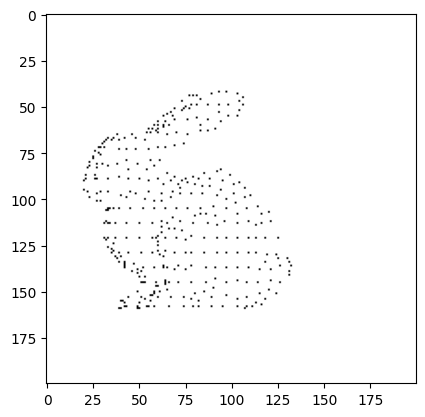

In [12]:
import matplotlib.pyplot as plt
import open3d as o3d
from IPython.display import clear_output
from PIL import Image


for i in range(70):
    plt.imshow(Image.fromarray(window.render(vertices)))
    plt.show()
    vertices.rotate(rotation_axis, angle)
    clear_output(wait=True)